In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from ucimlrepo import fetch_ucirepo

### Data & Visualisation

9 features (all numeric)

Binary classification

In [2]:
# fetch dataset
breast_cancer_coimbra = fetch_ucirepo(id=451)

X = breast_cancer_coimbra.data.features.to_numpy()
y = breast_cancer_coimbra.data.targets.to_numpy().flatten() - 1

In [3]:
# Show the counts
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))

# Show the scale of the features
for i in range(X.shape[1]):
    print(f"Feature {i}: {X[:, i].min()} - {X[:, i].max()}")

{0: 52, 1: 64}
Feature 0: 24.0 - 89.0
Feature 1: 18.37 - 38.57875854
Feature 2: 60.0 - 201.0
Feature 3: 2.432 - 58.46
Feature 4: 0.467408667 - 25.05034187
Feature 5: 4.311 - 90.28
Feature 6: 1.65602 - 38.04
Feature 7: 3.21 - 82.1
Feature 8: 45.843 - 1698.44


### Common code

In [4]:
# Config
NUM_FOLD = 5
RANDOM_STATE = 73
USE_PREPROCESSING = True


if USE_PREPROCESSING:
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

In [5]:
def get_fold_print_string(fold_result: list[float]):
    mean = np.mean(fold_result)
    ste = np.std(fold_result) / np.sqrt(NUM_FOLD)
    return f"{mean:.3f} ± {ste:.3f}"

In [6]:
def binary_classification(
    model,
    model_name: str,
    n_splits: int = NUM_FOLD,
    random_state: int = RANDOM_STATE,
):
    print(f"Model {model_name} with {n_splits}-fold cross-validation\n")
    skf = StratifiedKFold(
        n_splits=n_splits, shuffle=True, random_state=random_state
    )

    fold_accuracy = []
    fold_precision = []
    fold_recall = []
    fold_f1 = []

    fig, ax = plt.subplots(1, 5, figsize=(15, 4))
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        model.fit(X[train_index], y[train_index])

        y_pred = model.predict(X[test_index])

        acc = accuracy_score(y[test_index], y_pred)
        prec = precision_score(y[test_index], y_pred, zero_division=0)
        rec = recall_score(y[test_index], y_pred)
        f1 = f1_score(y[test_index], y_pred)

        fold_accuracy.append(acc)
        fold_precision.append(prec)
        fold_recall.append(rec)
        fold_f1.append(f1)

        print(
            f"Fold {i}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1={f1:.4f}"
        )

        # Plot confusion matrix
        cm = confusion_matrix(y[test_index], y_pred)
        disp = ConfusionMatrixDisplay(
            confusion_matrix=cm, display_labels=model.classes_
        )
        disp.plot(ax=ax[i], xticks_rotation=45)
        ax[i].set_title(f"Fold {i}")

    print("\nCross-Validation Results:")
    print(f"Mean Accuracy: {get_fold_print_string(fold_accuracy)}")
    print(f"Mean Precision: {get_fold_print_string(fold_precision)}")
    print(f"Mean Recall: {get_fold_print_string(fold_recall)}")
    print(f"Mean F1 Score: {get_fold_print_string(fold_f1)}")

    plt.tight_layout()

### Logistic regression

Model Logistic Regression with 5-fold cross-validation

Fold 0: Accuracy=0.7083, Precision=0.7500, Recall=0.6923, F1=0.7200
Fold 1: Accuracy=0.8261, Precision=0.8333, Recall=0.8333, F1=0.8333
Fold 2: Accuracy=0.7826, Precision=0.9000, Recall=0.6923, F1=0.7826
Fold 3: Accuracy=0.8261, Precision=0.8462, Recall=0.8462, F1=0.8462
Fold 4: Accuracy=0.7826, Precision=0.8333, Recall=0.7692, F1=0.8000

Cross-Validation Results:
Mean Accuracy: 0.785 ± 0.019
Mean Precision: 0.833 ± 0.021
Mean Recall: 0.767 ± 0.030
Mean F1 Score: 0.796 ± 0.020


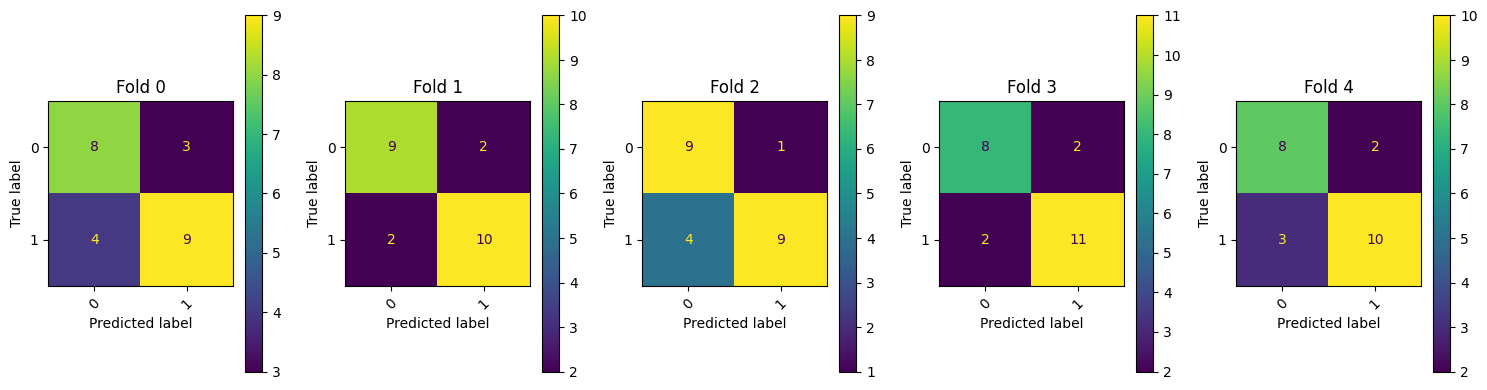

In [7]:
model = LogisticRegression(solver="liblinear")
binary_classification(model, "Logistic Regression")

### Random forest

Model Random Forest with 5-fold cross-validation

Fold 0: Accuracy=0.7500, Precision=0.7059, Recall=0.9231, F1=0.8000
Fold 1: Accuracy=0.7391, Precision=0.7500, Recall=0.7500, F1=0.7500
Fold 2: Accuracy=0.6522, Precision=0.6667, Recall=0.7692, F1=0.7143
Fold 3: Accuracy=0.6957, Precision=0.7143, Recall=0.7692, F1=0.7407
Fold 4: Accuracy=0.6957, Precision=0.6875, Recall=0.8462, F1=0.7586

Cross-Validation Results:
Mean Accuracy: 0.707 ± 0.016
Mean Precision: 0.705 ± 0.012
Mean Recall: 0.812 ± 0.029
Mean F1 Score: 0.753 ± 0.012


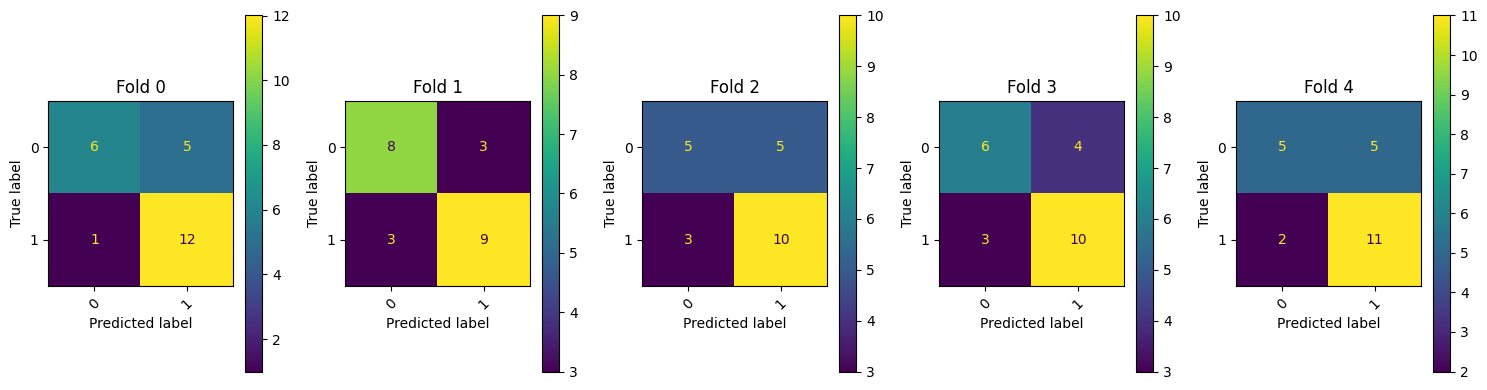

In [8]:
model = RandomForestClassifier(n_estimators=100, random_state=75)
binary_classification(model, "Random Forest")

### SVM

Model SVM with 5-fold cross-validation

Fold 0: Accuracy=0.6250, Precision=0.6429, Recall=0.6923, F1=0.6667
Fold 1: Accuracy=0.7826, Precision=0.8182, Recall=0.7500, F1=0.7826
Fold 2: Accuracy=0.7826, Precision=0.8333, Recall=0.7692, F1=0.8000
Fold 3: Accuracy=0.8261, Precision=0.8462, Recall=0.8462, F1=0.8462
Fold 4: Accuracy=0.6522, Precision=0.6667, Recall=0.7692, F1=0.7143

Cross-Validation Results:
Mean Accuracy: 0.734 ± 0.036
Mean Precision: 0.761 ± 0.039
Mean Recall: 0.765 ± 0.022
Mean F1 Score: 0.762 ± 0.029


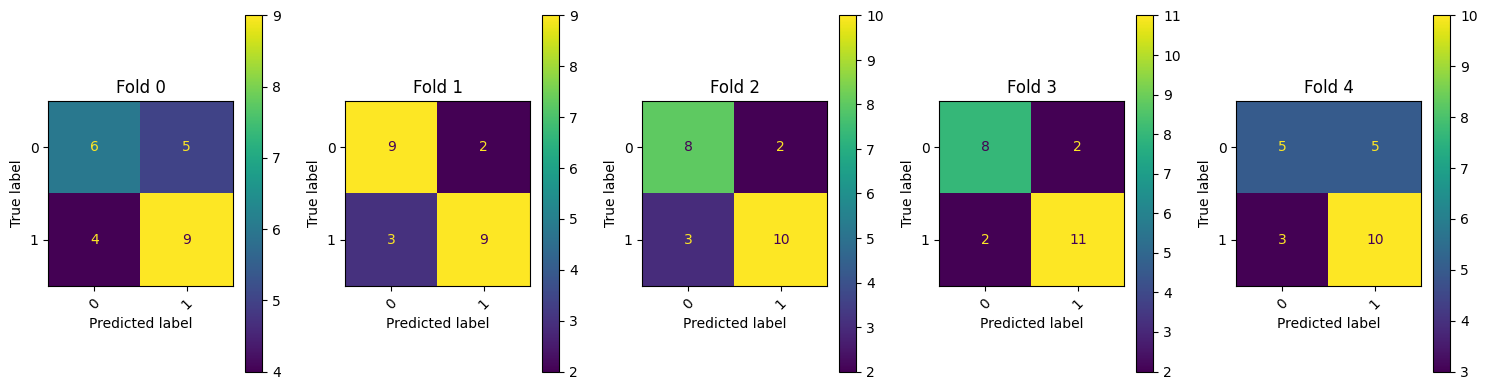

In [9]:
model = SVC(kernel="rbf", random_state=76, class_weight="balanced")
binary_classification(model, "SVM")